# Supervised Learning Algorithm Comparison Exercise

LR: 0.945121 (0.031251)
LDA: 0.947343 (0.036698)
KNN: 0.916570 (0.041193)
CART: 0.934155 (0.029248)
NB: 0.936377 (0.042049)
SVM: 0.626329 (0.004106)


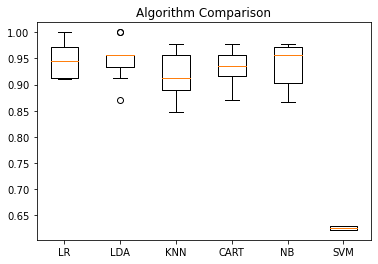

In [3]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

breast_cancer_data = datasets.load_breast_cancer()
# Split-out validation dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

#### 1. We've already done labs covering KNN and CART (decision tree). In a few sentences, explain each of the other algorithms above (LR, LDA, NB, SVM).

LR - Linear Regression models the probability of an event occuring, and uses a linear combination of input features to predict a binary output.

LDA - Linear Discriminant Analysis finds a linear combination of features to seperate the different classes.

NB - Naive Bayes is a probabilistic method that uses statistical data to predict the likelihood of an event occurring.

SVM - Support Vector Machines maximises the margain between the different classes to find a hyperplane in a high-dimensional space that separates the different classes.

#### 2. Rerun supervised learning comparison.

Find another dataset for which we could compare supervised learning techniques. Remember that the dataset must have a single output for which we want to train and build a model. For example, given a bunch of input parameters, would a person likely be granted a loan.

Next, implement the algorithms above for your chosen dataset. Try a few different variants of some of the algorithms. For example, in the kNN algorithm, you could specify a maximum depth. 


In [14]:
import pandas as pd
df = read_csv('titanic_full.csv')
df.head()
cat_df = ['survived']
finaldata = pd.get_dummies(df,columns=cat_df,drop_first=True)
finaldata.info()
finaldata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   name        1309 non-null   object 
 2   sex         1309 non-null   object 
 3   age         1046 non-null   float64
 4   sibsp       1309 non-null   int64  
 5   parch       1309 non-null   int64  
 6   ticket      1309 non-null   object 
 7   fare        1308 non-null   float64
 8   cabin       295 non-null    object 
 9   embarked    1307 non-null   object 
 10  boat        486 non-null    object 
 11  body        121 non-null    float64
 12  home.dest   745 non-null    object 
 13  survived_1  1309 non-null   uint8  
dtypes: float64(3), int64(3), object(7), uint8(1)
memory usage: 134.3+ KB


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived_1
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,1.0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [16]:
X = finaldata.drop('survived',axis=1)
y = finaldata['survived']

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

KeyError: "['survived'] not found in axis"

#### 3. How do the results compare? Was there an algorithm that consistently outperformed or underperformed?
